# **ICU MORTALITY PREDICTION**

## Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np

In [2]:
train_dataset=pd.read_csv("dataset.csv")
print(train_dataset.shape)
train_dataset.info()

(91713, 186)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [3]:
#no. of missing values in each feature in dataset
missing_values,missing_values1=[],[]
for i in train_dataset.columns.tolist():
    missing_values.append(i)
    missing_values1.append(train_dataset[i].isnull().sum())                      
missing_df=pd.DataFrame({'feature':missing_values,'count':missing_values1})
missing_df.to_csv('missing_values.csv',index=False)

In [4]:
#dropping columnns having more than 20000 missing values
for i in train_dataset:
    if train_dataset[i].isnull().sum()>20000:
        train_dataset.drop(i,axis=1,inplace=True)
train_dataset.shape

(91713, 108)

In [5]:
train_dataset.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


In [6]:
#dropped this variables as they have no significance for model building
dropcol=["encounter_id","patient_id","hospital_id","icu_id","readmission_status"]
train_dataset.drop(dropcol,axis=1,inplace=True)
train_dataset.shape

(91713, 103)

In [7]:
#list of categorical variables whose missing values are replaced with mode
cat_var=["hospital_death","elective_surgery","apache_post_operative","arf_apache","gcs_unable_apache","intubated_apache"
        ,"ventilated_apache","aids","cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia",
         "lymphoma","solid_tumor_with_metastasis"]
#list of integer variables whose missing values are replaced with mean
int_var=["age","apache_2_diagnosis","heart_rate_apache","gcs_verbal_apache","gcs_eyes_apache","gcs_motor_apache",
        "map_apache","d1_diasbp_max","d1_diasbp_min","d1_diasbp_noninvasive_max","d1_diasbp_noninvasive_min",
         "d1_heartrate_max","d1_heartrate_min","d1_mbp_max","d1_mbp_min","d1_mbp_noninvasive_max",
         "d1_mbp_noninvasive_min","d1_resprate_max","d1_resprate_min","d1_spo2_max","d1_spo2_min",
         "d1_sysbp_max","d1_sysbp_min","d1_sysbp_noninvasive_max","d1_sysbp_noninvasive_min","h1_diasbp_max",
         "h1_diasbp_min","h1_diasbp_noninvasive_max","h1_diasbp_noninvasive_min","h1_heartrate_max","h1_heartrate_min",
        "h1_diasbp_max","h1_diasbp_min","h1_diasbp_noninvasive_max",
         "h1_diasbp_noninvasive_min","h1_heartrate_max","h1_heartrate_min",
         "h1_mbp_max","h1_mbp_min","h1_mbp_noninvasive_max","h1_mbp_noninvasive_min",
         "h1_resprate_max","h1_resprate_min","h1_spo2_max","h1_spo2_min",
         "h1_sysbp_max","h1_sysbp_min","h1_sysbp_noninvasive_max","h1_sysbp_noninvasive_min","d1_glucose_max",
         "d1_glucose_min"]
for i in train_dataset:
    if train_dataset[i].dtypes=="object" or i in cat_var:
#         train_dataset[i].replace(r'^\s*$',np.nan,inplace=True,regex=True)
        train_dataset[i].fillna(train_dataset[i].mode()[0],inplace=True)
for i in int_var:
    train_dataset[i].fillna(round(train_dataset[i].mean()),inplace=True)
    
#list of float variables whose missing values are replaced with mean
for i in train_dataset:
    if train_dataset[i].dtypes=="float64":
        train_dataset[i].fillna(round(train_dataset[i].mean(),2),inplace=True)

In [8]:
missing_values,missing_values1=[],[]
for i in train_dataset.columns.tolist():
    missing_values.append(i)
    missing_values1.append(train_dataset[i].isnull().sum())                      
missing_df=pd.DataFrame({'feature':missing_values,'count':missing_values1})
missing_df.to_csv('missing_values1.csv',index=False)

In [9]:
#new training dataset after cleaning and preprocessing
train_dataset.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,29.19,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


## Exploratory Data Analysis

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dataset = train_dataset

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 103 entries, hospital_death to apache_2_bodysystem
dtypes: float64(93), int64(3), object(7)
memory usage: 72.1+ MB


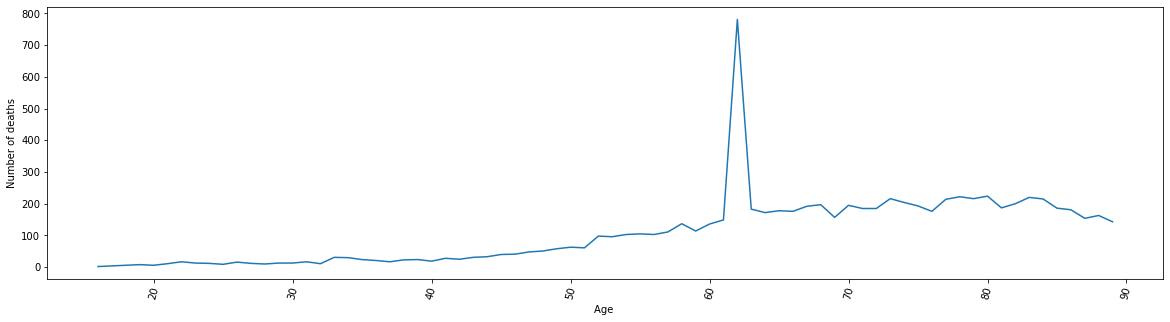

In [13]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('age')['hospital_death'].sum().plot(kind='line');
plt.xticks(rotation =75)
plt.xlabel('Age ')
plt.ylabel('Number of deaths');

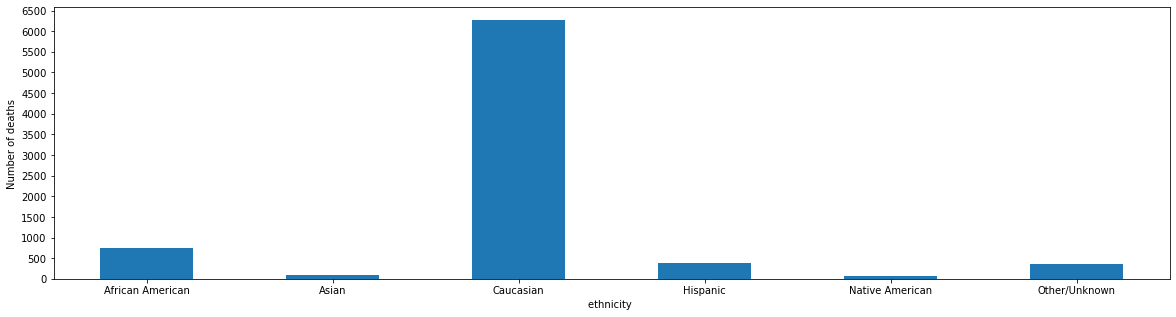

In [14]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('ethnicity')['hospital_death'].sum().plot(kind='bar');
plt.xticks(rotation= 0)
plt.yticks(np.arange(0,7000,500))
plt.xlabel('ethnicity ')
plt.ylabel('Number of deaths');

In [15]:
dataset.groupby('ethnicity')['hospital_death'].sum()

ethnicity
African American     750
Asian                 93
Caucasian           6273
Hispanic             376
Native American       70
Other/Unknown        353
Name: hospital_death, dtype: int64

In [16]:
dataset['ethnicity'].value_counts()

Caucasian           72079
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64

Age Vs Precondtion diseases - 

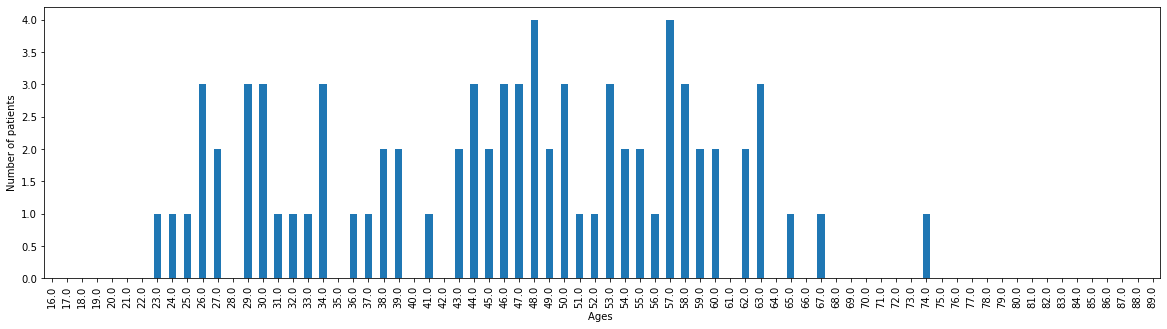

In [17]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('age')['aids'].sum().plot(kind='bar');
plt.xlabel('Ages ')
plt.ylabel('Number of patients');

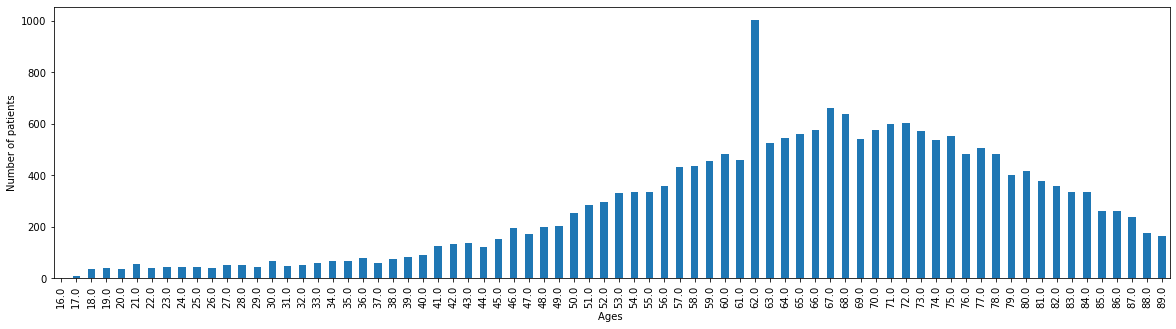

In [18]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('age')['diabetes_mellitus'].sum().plot(kind='bar');
plt.xlabel('Ages ')
plt.ylabel('Number of patients');

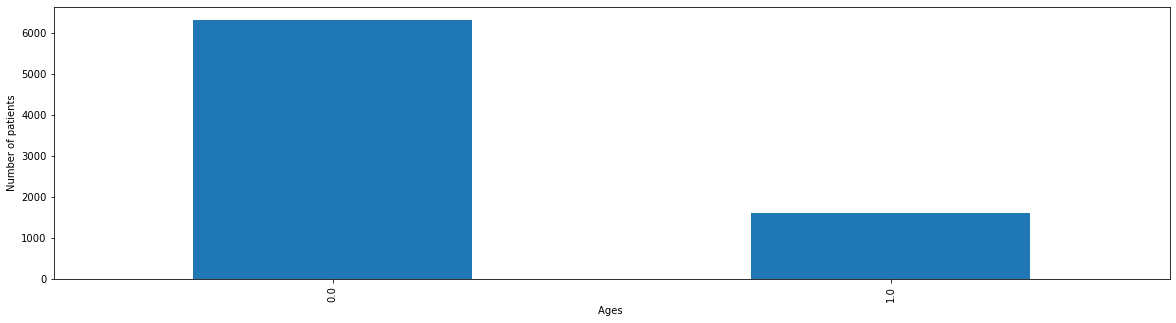

In [19]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('diabetes_mellitus')['hospital_death'].sum().plot(kind='bar');
plt.xlabel('Ages ')
plt.ylabel('Number of patients');

In [20]:
dataset.groupby('diabetes_mellitus')['hospital_death'].sum()

diabetes_mellitus
0.0    6320
1.0    1595
Name: hospital_death, dtype: int64

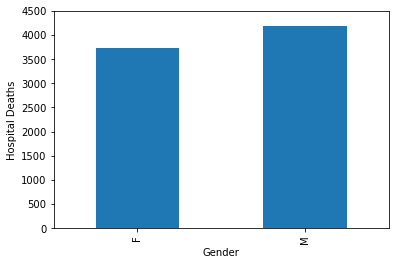

In [21]:
dataset.groupby('gender')['hospital_death'].sum().plot(kind='bar');
plt.yticks(np.arange(0,5000,500))
plt.xlabel('Gender')
plt.ylabel('Hospital Deaths');

In [22]:
dataset.groupby('gender')['hospital_death'].sum()

gender
F    3731
M    4184
Name: hospital_death, dtype: int64

In [23]:
dataset['gender'].value_counts()

M    49494
F    42219
Name: gender, dtype: int64

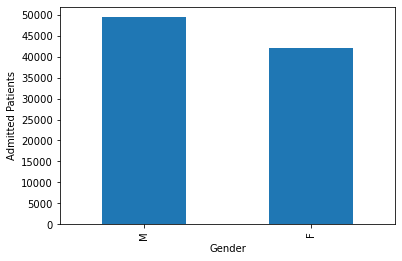

In [24]:
dataset['gender'].value_counts(sort = True).plot(kind = 'bar');
plt.yticks(np.arange(0,55000,5000))
plt.xlabel('Gender')
plt.ylabel('Admitted Patients');

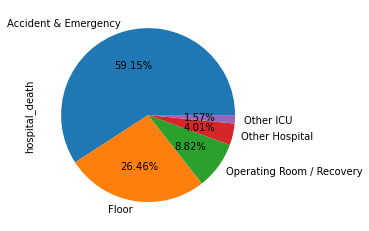

In [25]:
dataset.groupby('icu_admit_source')['hospital_death'].sum().plot(kind='pie',autopct='%1.2f%%')
#plt.yticks(np.arange(0,6000,1000))
#plt.xticks(rotation=90)
plt.show()

In [26]:

dataset.groupby('icu_admit_source')['hospital_death'].sum()

icu_admit_source
Accident & Emergency         4682
Floor                        2094
Operating Room / Recovery     698
Other Hospital                317
Other ICU                     124
Name: hospital_death, dtype: int64

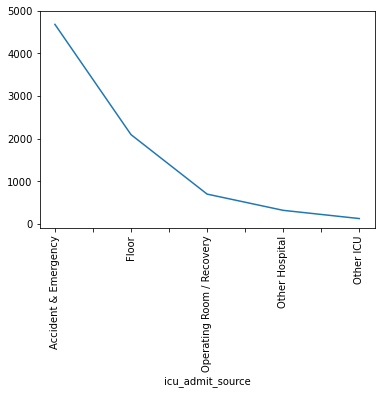

In [27]:
dataset.groupby('icu_admit_source')['hospital_death'].sum().plot(kind='line')
plt.yticks(np.arange(0,6000,1000))
plt.xticks(rotation=90)
plt.show()

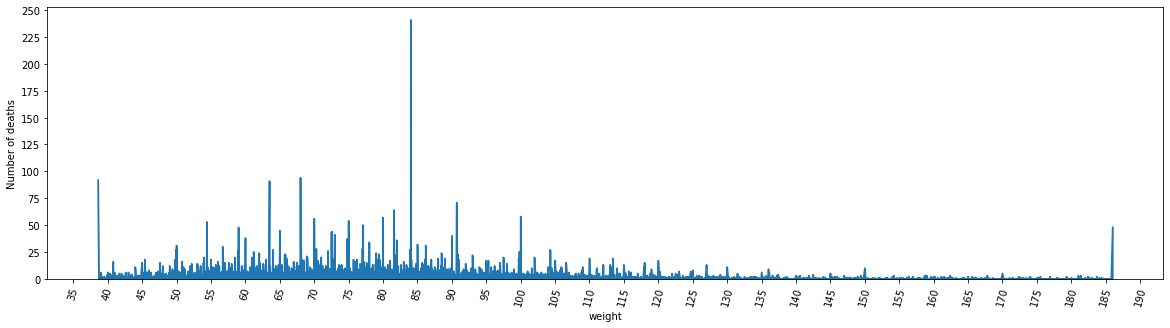

In [28]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('weight')['hospital_death'].sum().plot(kind='area');
plt.xticks(rotation =75)
plt.xticks(np.arange(35,195,5))
plt.yticks(np.arange(0,275,25))
plt.xlabel('weight')
plt.ylabel('Number of deaths');

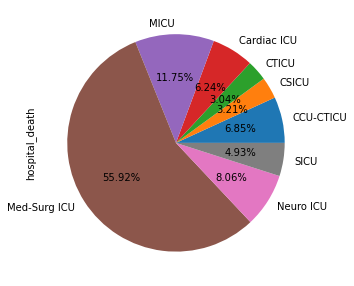

In [29]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('icu_type')['hospital_death'].sum().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [30]:
dataset.groupby('icu_type')['hospital_death'].sum()

icu_type
CCU-CTICU        542
CSICU            254
CTICU            241
Cardiac ICU      494
MICU             930
Med-Surg ICU    4426
Neuro ICU        638
SICU             390
Name: hospital_death, dtype: int64

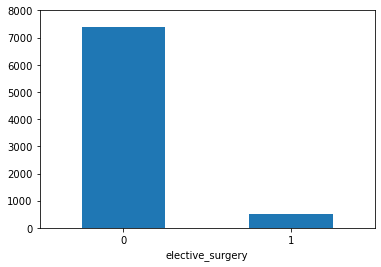

elective_surgery  hospital_death
0                 0                 67468
                  1                  7394
1                 0                 16330
                  1                   521
Name: hospital_death, dtype: int64


In [31]:
dataset.groupby('elective_surgery')['hospital_death'].sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.yticks(np.arange(0,9000,1000))
plt.show()
print(dataset.groupby('elective_surgery')['hospital_death'].value_counts())

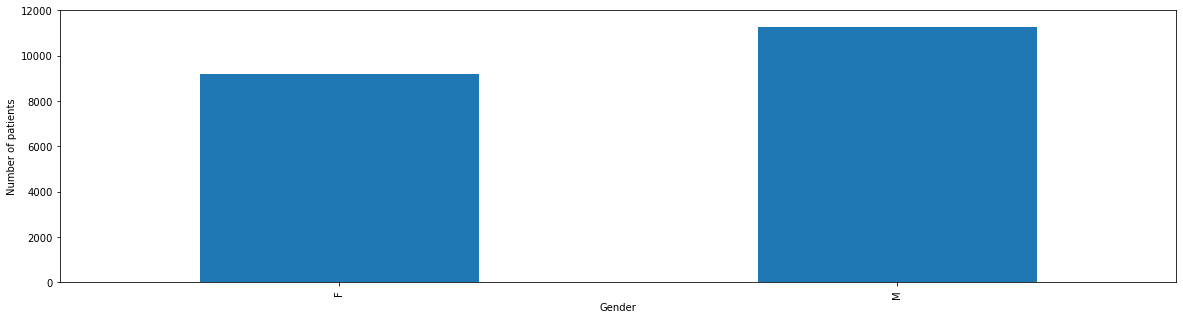

In [32]:
fig = plt.subplots(figsize=(20,5))
dataset.groupby('gender')['diabetes_mellitus'].sum().plot(kind='bar');
plt.yticks(np.arange(0,14000,2000))
plt.xlabel('Gender')
plt.ylabel('Number of patients');

In [33]:
train_dataset['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

## Label Encoding

In [34]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

In [35]:
cat_features = ['apache_3j_bodysystem','apache_2_bodysystem','icu_stay_type','icu_admit_source','icu_type','gender','ethnicity']
for feature in cat_features:
    dataset[feature]=LE.fit_transform(dataset[feature])

In [36]:
dataset

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,2,1,180.3,1,0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0
1,0,77.0,27.420000,0,2,0,160.0,1,0,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6
2,0,25.0,31.950000,0,2,0,172.7,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
3,0,81.0,22.640000,1,2,0,165.1,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,19.0,29.190000,0,2,1,188.0,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,2,1,177.8,1,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0
91709,0,56.0,47.179671,0,2,0,183.0,1,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0
91710,0,48.0,27.236914,0,2,1,170.2,0,0,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3
91711,0,62.0,23.297481,0,2,0,154.9,0,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6


In [37]:
corr_dataset = dataset

In [38]:
for column in corr_dataset.columns:
    if column in cat_var:
        corr_dataset=corr_dataset.drop([column], axis=1)
    if column in cat_features:
        corr_dataset=corr_dataset.drop([column], axis=1)

In [39]:
corr_mat = corr_dataset.corr().abs()
print(corr_mat)
corr_values = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))
print(corr_values)


                                    age       bmi    height  pre_icu_los_days  \
age                            1.000000  0.083308  0.105548          0.049158   
bmi                            0.083308  1.000000  0.055653          0.001510   
height                         0.105548  0.055653  1.000000          0.008050   
pre_icu_los_days               0.049158  0.001510  0.008050          1.000000   
weight                         0.122111  0.873688  0.385740          0.004369   
...                                 ...       ...       ...               ...   
d1_sodium_min                  0.035042  0.014991  0.022027          0.012661   
d1_wbc_max                     0.002668  0.022188  0.011766          0.059000   
d1_wbc_min                     0.001414  0.021455  0.016347          0.044841   
apache_4a_hospital_death_prob  0.132538  0.031027  0.027468          0.056084   
apache_4a_icu_death_prob       0.071151  0.012814  0.010867          0.035626   

                           

C:\Users\GREESH~1\AppData\Local\Temp/ipykernel_12084/2678321338.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_values = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool))


In [40]:
drop = [column for column in corr_values.columns if any(corr_values[column] > 0.90)]

In [41]:
drop_columns = drop
drop_columns

['d1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_bun_max',
 'd1_bun_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_glucose_max',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_platelets_min',
 'd1_wbc_min']

In [42]:
corr_dataset= corr_dataset.drop(corr_dataset[drop_columns],axis=1)

In [43]:
corr_dataset

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,gcs_eyes_apache,...,d1_hemaglobin_max,d1_hemaglobin_min,d1_platelets_max,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,180.3,0.541667,73.90,113.0,502.01,31.00,2.51,3.0,...,8.90,8.90,233.00,4.00,3.40,136.00,134.00,14.10,0.10,0.05
1,77.0,27.420000,160.0,0.927778,70.20,108.0,203.01,9.00,0.56,1.0,...,11.30,11.10,557.00,4.20,3.80,145.00,145.00,23.30,0.47,0.29
2,25.0,31.950000,172.7,0.000694,95.30,122.0,703.03,25.83,1.48,3.0,...,11.45,10.89,207.11,4.25,3.93,139.12,137.72,12.48,0.00,0.00
3,81.0,22.640000,165.1,0.000694,61.70,203.0,1206.03,25.83,1.48,4.0,...,11.60,8.90,198.00,5.00,3.50,139.12,137.72,9.00,0.04,0.03
4,19.0,29.190000,188.0,0.073611,84.03,119.0,601.01,25.83,1.48,3.0,...,11.45,10.89,207.11,4.25,3.93,139.12,137.72,12.48,0.09,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,177.8,0.298611,72.90,113.0,501.06,25.83,1.48,4.0,...,13.20,13.20,92.00,4.20,4.20,140.00,140.00,5.68,0.12,0.05
91709,56.0,47.179671,183.0,0.120139,158.00,113.0,501.05,34.00,2.30,4.0,...,10.50,10.50,133.00,3.80,3.80,136.00,136.00,4.22,0.03,0.02
91710,48.0,27.236914,170.2,0.046528,78.90,123.0,702.01,33.00,2.30,3.0,...,12.30,12.30,227.00,4.70,3.20,139.00,135.00,17.55,0.05,0.02
91711,62.0,23.297481,154.9,0.081944,55.90,108.0,203.01,25.83,1.48,4.0,...,11.45,10.89,207.11,4.25,3.93,139.12,137.72,12.48,0.07,0.02


In [44]:
for feature in cat_features:
    corr_dataset[feature] = dataset[feature]

In [45]:
for feature in cat_var:
    corr_dataset[feature] = dataset[feature]
    

In [46]:
corr_dataset

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,bun_apache,creatinine_apache,gcs_eyes_apache,...,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,68.0,22.730000,180.3,0.541667,73.90,113.0,502.01,31.00,2.51,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,77.0,27.420000,160.0,0.927778,70.20,108.0,203.01,9.00,0.56,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25.0,31.950000,172.7,0.000694,95.30,122.0,703.03,25.83,1.48,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81.0,22.640000,165.1,0.000694,61.70,203.0,1206.03,25.83,1.48,4.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,29.190000,188.0,0.073611,84.03,119.0,601.01,25.83,1.48,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,177.8,0.298611,72.90,113.0,501.06,25.83,1.48,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,56.0,47.179671,183.0,0.120139,158.00,113.0,501.05,34.00,2.30,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,48.0,27.236914,170.2,0.046528,78.90,123.0,702.01,33.00,2.30,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,62.0,23.297481,154.9,0.081944,55.90,108.0,203.01,25.83,1.48,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning Models

In [47]:
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [48]:
Y = corr_dataset["hospital_death"]
corr_dataset.drop(['hospital_death'],axis=1,inplace=True)
print(corr_dataset.shape)
X= corr_dataset

(91713, 81)


In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Lr=LogisticRegression(max_iter=10000)
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, roc_auc_score
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16672
           1       0.67      0.25      0.37      1671

    accuracy                           0.92     18343
   macro avg       0.80      0.62      0.66     18343
weighted avg       0.91      0.92      0.90     18343

ROC AUC Score is:  0.8710424872299393


### Near-Miss(Logistic Regression)

In [53]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [54]:
import imblearn
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, Y)

In [55]:
print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 83798, 1: 7915})
Resample dataset shape: Counter({0: 7915, 1: 7915})


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state=0)

In [57]:
Lr=LogisticRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print('Classification Report after applying "Near Miss" algorithm\n',classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1]))

Classification Report after applying "Near Miss" algorithm
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1568
           1       0.95      0.90      0.93      1598

    accuracy                           0.93      3166
   macro avg       0.93      0.93      0.93      3166
weighted avg       0.93      0.93      0.93      3166

ROC AUC Score is:  0.9749735000383134


In [59]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, Lr.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1]))

0.9770082550258954
0.9749735000383134


### SMOTE(Logistic Regression)

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

In [61]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 83798, 1: 7915})
Resample dataset shape Counter({0: 83798, 1: 83798})


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [63]:
Lr=LogisticRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print('Classification Report after applying "SMOTE" algorithm\n',classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1]))

Classification Report after applying "SMOTE" algorithm
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     16634
           1       0.80      0.78      0.79     16886

    accuracy                           0.79     33520
   macro avg       0.79      0.79      0.79     33520
weighted avg       0.79      0.79      0.79     33520

ROC AUC Score is:  0.8724997928309497


In [65]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, Lr.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1]))

0.8724035305747531
0.8724997928309497


## Decision Trees

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [67]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     16672
           1       0.34      0.36      0.35      1671

    accuracy                           0.88     18343
   macro avg       0.64      0.64      0.64     18343
weighted avg       0.88      0.88      0.88     18343

ROC AUC Score is:  0.6446850472839715


### Near-Miss(Decision Trees)

In [69]:
import imblearn
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, Y)

In [70]:
print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 83798, 1: 7915})
Resample dataset shape: Counter({0: 7915, 1: 7915})


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state=0)

In [72]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print('Classification Report after applying "Near Miss" algorithm\n',classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

Classification Report after applying "Near Miss" algorithm
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1568
           1       0.89      0.88      0.88      1598

    accuracy                           0.88      3166
   macro avg       0.88      0.88      0.88      3166
weighted avg       0.88      0.88      0.88      3166

ROC AUC Score is:  0.8809505185052745


### SMOTE(Decision Trees)

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

In [75]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 83798, 1: 7915})
Resample dataset shape Counter({0: 83798, 1: 83798})


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [77]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print('Classification Report after applying "SMOTE" algorithm\n',classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

Classification Report after applying "SMOTE" algorithm
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     16634
           1       0.91      0.93      0.92     16886

    accuracy                           0.92     33520
   macro avg       0.92      0.92      0.92     33520
weighted avg       0.92      0.92      0.92     33520

ROC AUC Score is:  0.9187439585780953


## XGBoost

In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.9623210023866349
0.9433258320502191
0.981151832460733
0.9618670933848616
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16634
           1       0.98      0.94      0.96     16886

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520

0.9903816027560411


In [83]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16634
           1       0.98      0.94      0.96     16886

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520

ROC AUC Score is:  0.9903816027560411


### Near-Miss(XGBoost)

In [84]:
import imblearn
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, Y)

In [85]:
print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 83798, 1: 7915})
Resample dataset shape: Counter({0: 7915, 1: 7915})


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state=0)

In [87]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Classification report after applying "Near Miss" algorithm\n', classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification report after applying "Near Miss" algorithm
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1568
           1       0.96      0.94      0.95      1598

    accuracy                           0.95      3166
   macro avg       0.95      0.95      0.95      3166
weighted avg       0.95      0.95      0.95      3166

ROC AUC Score is:  0.9878630973666063


### SMOTE(XGBoost)

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

In [89]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))     

Original dataset shape Counter({0: 83798, 1: 7915})
Resample dataset shape Counter({0: 83798, 1: 83798})


In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [91]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Classification report after applying "SMOTE" algorithm\n', classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification report after applying "SMOTE" algorithm
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     16634
           1       0.98      0.94      0.96     16886

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520

ROC AUC Score is:  0.9903962975533432


## Selecting Top 25 Features through Recurrent Feature Elimination

In [92]:
from sklearn.feature_selection import RFE

In [93]:
dt = tree.DecisionTreeClassifier()
rfe = RFE(estimator=dt, n_features_to_select=25, step=1)
rfe.fit(X, Y)
ranking = rfe.ranking_

In [94]:
ranking

array([ 1,  1,  7,  1,  1, 32,  4,  9,  1, 41, 35, 38,  1,  1,  1, 17, 20,
       26, 25,  1,  6,  1,  1, 19,  1, 10,  3, 33,  1,  1,  1,  1,  1, 29,
       15, 14, 21, 13, 24, 23, 11, 28, 31,  1,  2, 12, 18,  1, 27,  1,  8,
       22,  1, 16,  5,  1, 30,  1,  1,  1, 40, 36, 51, 37, 34, 54, 39, 53,
       55, 47, 46, 43, 45, 56, 52, 50, 48, 44, 57, 49, 42])

In [95]:
red_dataset = corr_dataset
i=0

for column in corr_dataset:
    if(ranking[i]!=1):
        red_dataset=red_dataset.drop([column],axis=1)
    i=i+1
        
    

In [96]:
red_dataset

,age,bmi,pre_icu_los_days,weight,creatinine_apache,glucose_apache,heart_rate_apache,hematocrit_apache,d1_diasbp_max,d1_heartrate_max,...,d1_temp_max,d1_temp_min,h1_sysbp_max,d1_glucose_min,d1_hco3_min,d1_platelets_max,d1_sodium_max,d1_wbc_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,68.0,22.730000,0.541667,73.90,2.51,168.00,118.0,27.40,68.0,119.0,...,39.9,37.2,131.0,109.0,15.00,233.00,136.00,14.10,0.10,0.05
1,77.0,27.420000,0.927778,70.20,0.56,145.00,120.0,36.90,95.0,118.0,...,36.3,35.1,95.0,128.0,26.00,557.00,145.00,23.30,0.47,0.29
2,25.0,31.950000,0.000694,95.30,1.48,160.33,102.0,32.99,88.0,96.0,...,37.0,36.7,148.0,114.0,23.17,207.11,139.12,12.48,0.00,0.00
3,81.0,22.640000,0.000694,61.70,1.48,185.00,114.0,25.90,48.0,116.0,...,38.0,34.8,136.0,88.0,23.17,198.00,139.12,9.00,0.04,0.03
4,19.0,29.190000,0.073611,84.03,1.48,160.33,60.0,32.99,99.0,89.0,...,37.2,36.7,130.0,114.0,23.17,207.11,139.12,12.48,0.09,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.0,23.060250,0.298611,72.90,1.48,381.00,115.0,32.99,104.0,115.0,...,38.2,36.6,94.0,187.0,28.00,92.00,140.00,5.68,0.12,0.05
91709,56.0,47.179671,0.120139,158.00,2.30,177.00,100.0,33.00,73.0,100.0,...,37.4,36.1,127.0,177.0,30.00,133.00,136.00,4.22,0.03,0.02
91710,48.0,27.236914,0.046528,78.90,2.30,538.00,158.0,36.00,77.0,158.0,...,36.9,35.8,133.0,86.0,7.00,227.00,139.00,17.55,0.05,0.02
91711,62.0,23.297481,0.081944,55.90,1.48,160.33,60.0,32.99,99.0,82.0,...,36.5,36.3,133.0,114.0,23.17,207.11,139.12,12.48,0.07,0.02


In [97]:
X= red_dataset

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## RFE Logistic Regression

In [99]:

import imblearn
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, Y)

import imblearn
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, Y)


print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state=0)
Lr=LogisticRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
#print(accuracy_score(y_test,y_pred))
#print(recall_score(y_test,y_pred))
#print(precision_score(y_test,y_pred))
#print(f1_score(y_test,y_pred))
print('Classification Report after applying "Near Miss" algorithm\n',classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, Lr.predict_proba(X_test)[:, 1]))


Original dataset shape: Counter({0: 83798, 1: 7915})
Resample dataset shape: Counter({0: 7915, 1: 7915})
Classification Report after applying "Near Miss" algorithm
               precision    recall  f1-score   support

           0       0.77      0.87      0.81      1568
           1       0.85      0.74      0.79      1598

    accuracy                           0.80      3166
   macro avg       0.81      0.81      0.80      3166
weighted avg       0.81      0.80      0.80      3166

ROC AUC Score is:  0.8683007777579117


C:\Users\Greeshma Sai Sree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RFE Decision Trees

In [100]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

0.8379658875552748
0.8291614518147684
0.8466453674121406
0.8378122036041731
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1568
           1       0.85      0.83      0.84      1598

    accuracy                           0.84      3166
   macro avg       0.84      0.84      0.84      3166
weighted avg       0.84      0.84      0.84      3166

0.8380501136624862


In [102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

In [103]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 83798, 1: 7915})
Resample dataset shape Counter({0: 83798, 1: 83798})


In [104]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [105]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

0.925208830548926
0.9324884519720479
0.920119207619938
0.9262625371334452
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     16634
           1       0.92      0.93      0.93     16886

    accuracy                           0.93     33520
   macro avg       0.93      0.93      0.93     33520
weighted avg       0.93      0.93      0.93     33520

0.9251536885326153


## RFE XGBoost

In [107]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [108]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.960173031026253
0.9432073907378894
0.976936760105502
0.9597758293410467
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16634
           1       0.98      0.94      0.96     16886

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520

0.9888820480893943


In [109]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16634
           1       0.98      0.94      0.96     16886

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520

ROC AUC Score is:  0.9888820480893943


In [110]:
import imblearn
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, Y)

In [111]:
print('Original dataset shape:', Counter(Y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 83798, 1: 7915})
Resample dataset shape: Counter({0: 7915, 1: 7915})


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_nm, y_nm, test_size=0.2, random_state=0)

In [113]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Classification report after applying "Near Miss" algorithm\n', classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification report after applying "Near Miss" algorithm
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      1568
           1       0.93      0.90      0.91      1598

    accuracy                           0.91      3166
   macro avg       0.91      0.91      0.91      3166
weighted avg       0.91      0.91      0.91      3166

ROC AUC Score is:  0.9711090553242574


In [114]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

In [115]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 83798, 1: 7915})
Resample dataset shape Counter({0: 83798, 1: 83798})


In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [117]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Classification report after applying "SMOTE" algorithm\n', classification_report(y_test, y_pred))
print('ROC AUC Score is: ',roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Classification report after applying "SMOTE" algorithm
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     16634
           1       0.98      0.94      0.96     16886

    accuracy                           0.96     33520
   macro avg       0.96      0.96      0.96     33520
weighted avg       0.96      0.96      0.96     33520

ROC AUC Score is:  0.9886698537922672
